In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
import numpy as np

In [4]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [19]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[0].shape  # 28 X 28 matries  ----> for 6000 times

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

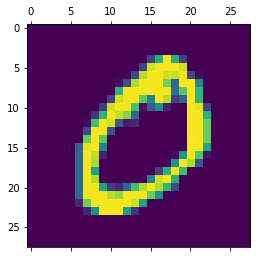

In [9]:
plt.matshow(X_train[1])

In [20]:
y_train.shape

(60000,)

In [10]:
y_train[1]

0

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

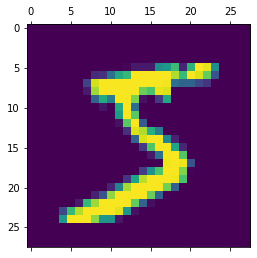

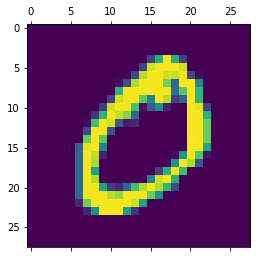

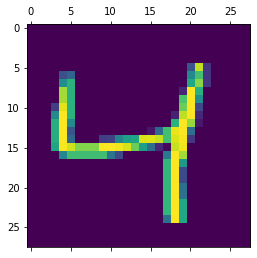

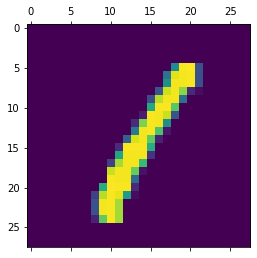

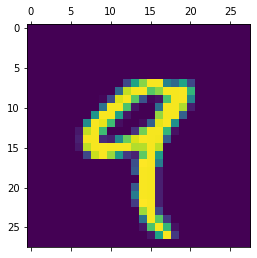

In [18]:
for i in range(5):
    plt.matshow(X_train[i])

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
# scaling the data between 0 to 1
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test),28*28)

In [14]:
X_train_flatten.shape

(60000, 784)

In [15]:
X_test_flatten.shape

(10000, 784)

In [16]:
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,),activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4661 - accuracy: 0.8790
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3032 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2825 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9256


In [18]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2715 - accuracy: 0.9230


[0.2714836895465851, 0.9229999780654907]

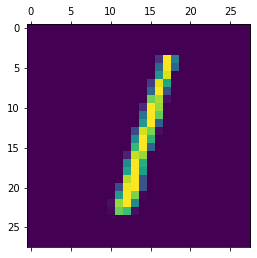

In [27]:
plt.matshow(X_test[2])

In [28]:
y_predicted = model.predict(X_test_flatten)

In [29]:
y_predicted[2]

array([4.4524670e-04, 9.9196768e-01, 5.7562536e-01, 3.1943023e-01,
       2.8843284e-02, 1.0016817e-01, 1.6271394e-01, 1.5403500e-01,
       3.4821010e-01, 4.8196316e-02], dtype=float32)

In [30]:
np.argmax(y_predicted[2])

1

In [31]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [33]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [35]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    0,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1117,    2,    2,    0,    1,    4,    2,    7,    0],
       [   8,   12,  894,   33,   12,    4,   12,   12,   42,    3],
       [   3,    0,   11,  939,    0,   21,    2,   12,   14,    8],
       [   2,    1,    2,    2,  920,    0,   11,    4,    9,   31],
       [   9,    2,    2,   41,   10,  772,   15,    7,   27,    7],
       [  13,    3,    3,    2,    8,   18,  907,    2,    2,    0],
       [   1,    6,   18,   10,    7,    0,    0,  960,    2,   24],
       [   8,   11,    5,   30,    9,   32,    9,   15,  850,    5],
       [  11,    7,    1,   11,   32,    8,    0,   31,    2,  906]])>

Text(69.0, 0.5, 'Truth')

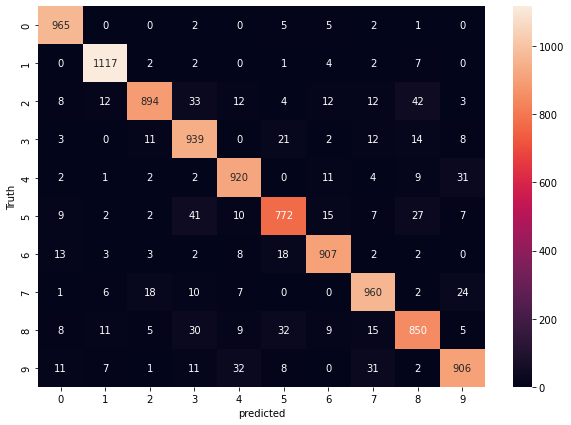

In [37]:
import seaborn as sns 
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("predicted")
plt.ylabel("Truth")

In [41]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape = (784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2743 - accuracy: 0.9225
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1226 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0863 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0654 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0531 - accuracy: 0.9834


In [42]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0800 - accuracy: 0.9757


[0.07999362051486969, 0.9757000207901001]

In [47]:
# automatically does the flattening of input 28 X 28 matries...
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2751 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1243 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0875 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0662 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0517 - accuracy: 0.9840
